# Theory

$\newcommand{\pla}{_{\rm pl}}$

We assume that planets move without noticing a gravitational interaction with the satellite, so their orbits are described by
\begin{equation}
  r_{\rm planet} = \frac{a(1-\varepsilon\pla^2)}{1+\varepsilon\pla\cos\theta\pla}
  \label{eq:rJ}
\end{equation}
Using
\begin{equation}
  L = \mu r^2 \dot{\theta} = \sqrt{G \mu M_{\odot} M\pla a\pla (1 - \varepsilon\pla^2)}
\end{equation}
we find that
\begin{equation}
  \dot{\theta} = \frac{1}{r\pla^2}\sqrt{G(M_\odot+M\pla) a\pla (1 - \varepsilon\pla^2)}
\end{equation}
which allows $\dot{\theta}$ to be computed for a given value of $r\pla$, which itself can be determined by Eq. (\ref{eq:rJ}).

<p style="text-align: center;"><img src='planet-satellite.png' width='400px'>
</p>

We now analyze the motion of the satellite. By the law of cosines, the separation between the planet and the satellite is given by
\begin{equation}
  s = \sqrt{r\pla^2 + r^2 - 2 r r\pla \cos(\theta - \theta\pla)}
\end{equation}
I initially used the law of sines to work out $\psi$:
\begin{equation}
  \frac{\sin(\theta - \theta\pla)}{s} = \frac{\sin\psi}{r\pla}
\end{equation}
Because $\theta - \theta\pla$ could be larger than $\pi$, which would correspond to taking an exterior angle of the triangle, rather than an interior one, we have to insist that $\sin(\theta - \theta\pla) \ge 0$. 

However, I ran into errors in working out the proper signs for the $\hat{\theta}$ component of the force from Jupiter, so I went back to the drawing board and used the law of cosines again to make sure I had the right value for $\psi$:

\begin{align*}
  r\pla^2 &= r^2 + s^2 - 2 r s \cos\psi \\
  \cos\psi &= \frac{r^2 + s^2 - r\pla^2}{2 r s} \\
  \cos\psi &= \frac{r^2 + [r^2 + r\pla^2 - 2 r r\pla \cos(\theta\pla-\theta)] - r\pla^2}{2 r s} \\
  \cos\psi &= \frac{2 r^2 - 2 r r\pla \cos(\theta\pla-\theta)}{2 r s} \\
  \cos\psi &= \frac{r - r\pla \cos(\theta\pla-\theta)}{s}
\end{align*}
and then using 
\begin{equation}
  \sin\psi = \sqrt{1 - \cos^2\psi}
\end{equation}

It turns out that numerical error can lead to $\cos^2\psi$ being minutely greater than 1, which throws an error. In that case, I just set $\sin\psi = 0$.

<p style="text-align: center;"><img src='sat-planet.png' width='400px'></p>

The final subtlety has to do with the expression for 
\begin{equation}
  \boxed{\hat{s} = -\cos\psi \hat{\mathbf{r}} + \sin\psi \hat{\boldsymbol{\theta}}}
\end{equation}
which is a unit vector pointing from the satellite to the planet. If $\pi < \mathrm{mod}(\theta\pla - \theta, 2\pi) < 2\pi$, the $\theta$ component of $\hat{s}$ should be negative. 

Finally, the acceleration of the satellite is given by the two gravitational influences as
\begin{equation}
  \mathbf{a} = - \frac{GM_\odot}{r^2} \hat{\mathbf{r}} + \frac{G M\pla}{s^2} \hat{\mathbf{s}}
\end{equation}
where the acceleration in polar coordinates is
\begin{equation}
  \mathbf{a} = (\ddot{r} - r \dot{\theta}^2)\hat{\mathbf{r}} +
  (2 \dot{r} \dot{\theta} + r \ddot{\theta})\hat{\boldsymbol{\theta}}
\end{equation}

Therefore, 
\begin{align*}
  \ddot{r} &= a_r + r \dot{\theta}^2 \\
  \ddot{\theta} &= a_{\theta} - 2 \dot{r} \dot{\theta}
\end{align*}

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from p24asolver import P24ASolver

from math import sin, cos, sqrt
from copy import deepcopy

In [2]:
from boosts import Satellite, Planet, Jupiter, Saturn, CartesianSatellite

In [3]:
print(Jupiter)

          planet  Jupiter
  mass (mMsolar)  0.955
          a (AU)  5.201
    radius (mAU)  0.478
      period (y)  11.86
               e  0.0484


In [4]:
import wingdbstub

In [4]:
def Hohmann(r0, rf, thetaJ):
    """Attempt to construct a Hohmann transfer orbit starting at radial distance r0 to meet
    up with Jupiter when Jupiter is at thetaJ. We'll pretend that Jupiter is on a circular
    orbit."""
    a = 0.5 * (r0 + rf)
    period = a**1.5
    # We want the satellite to arrive at Jupiter at period/2
    # If Jupiter's orbit is a circle, then we know how far around it will go in this time
    Jupiter_delta_theta = np.pi * period / Jupiter.period
    # So, we need the satellite's perihelion to be pi away from here
    # and it needs to be moving at
    eps = (rf - r0)/(rf + r0)
    thetadot = 2 * np.pi / (1 - eps)**2 * sqrt((1 - eps**2)/a**3)
    Y0 = [r0, thetaJ - np.pi, 0, thetadot, thetaJ - Jupiter_delta_theta]
    return Y0

In [5]:
modJ = deepcopy(Jupiter)
modJ.mass *= 1
Y0 = Hohmann(1, 6, np.pi/2)
Y0

[1, -1.5707963267948966, 0, 8.22662065016709, -0.16432135382428426]

<IPython.core.display.Javascript object>


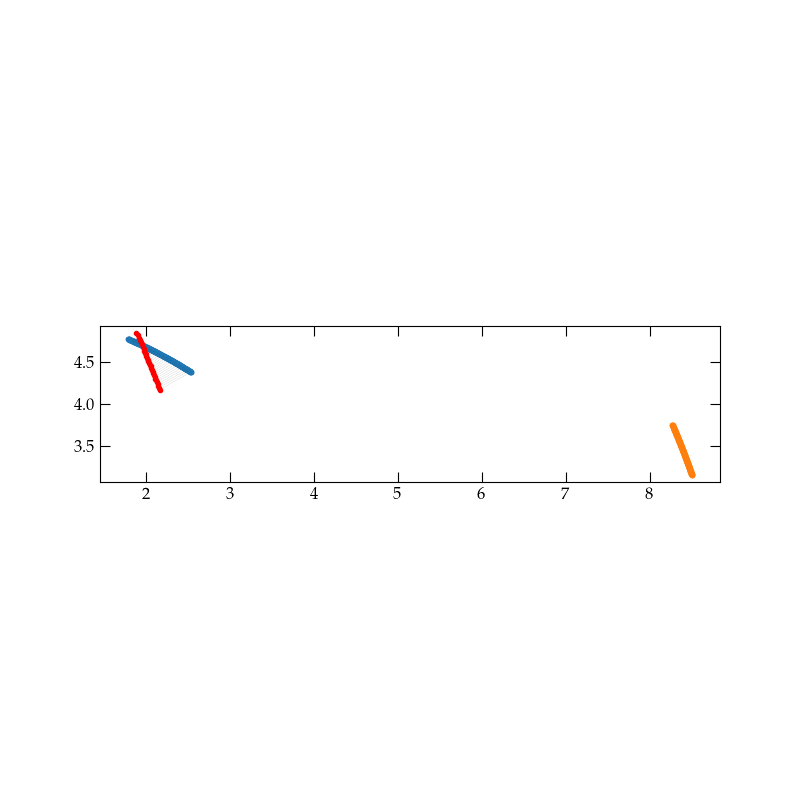

<IPython.core.display.Javascript object>


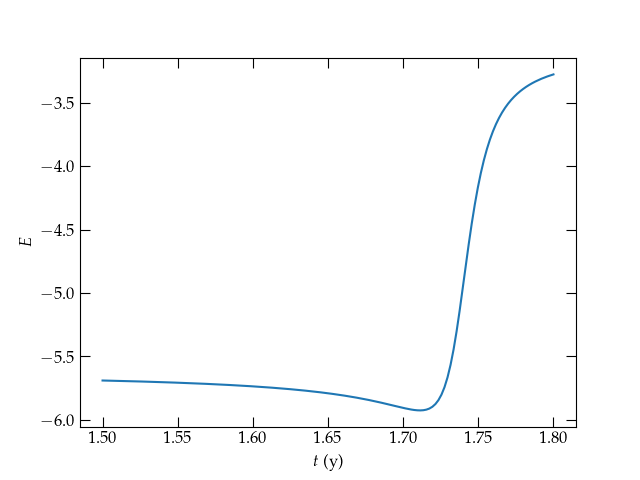

In [6]:
plt.close('all')

JSat = Satellite([modJ, Saturn])

Y0 = Hohmann(1, 6, np.pi/2)
#Y0[4] += -0.008
#Y0[4] += 0.38 # advance J
Y0[4] = .186
Y0.append(0)

t_range = (0, 5)
csat = CartesianSatellite([modJ])
cY0 = [0, -1, Y0[3], Y0[2], Y0[4]]
csat.solve(cY0, t_range)

JSat.solve(Y0, t_range)
crash = len(JSat.solution.t_events[1]) > 0
if crash:
    print("The satellite crashed into Jupiter!")
else:
    #JSat.plot_trajectory(t_range)
    tclose = JSat.solution.t_events[0]
    row = JSat.closest_approach(t_range)
    t_min = row._name
    #JSat.plot_trajectory((t_min-0.04, t_min+0.04), Sun=False) # (t_min-0.001, t_min+0.001), N=100, sun=False)
    t_range = (1.5, 1.8)
    JSat.plot_trajectory(t_range, Sun=False)
    fig = plt.gcf()
    JSat.plot_satellite_energy(trange=t_range)
    ax = fig.axes[0]
    tv = np.linspace(*t_range, 31)
    Y = csat(tv)
    ax.plot(Y[:,0], Y[:,1], 'r.')

In [7]:
Y1, bestE = JSat.max_boost(Y0, 10, vary=4, bounds=(0., 0.4))

In [8]:
Y1

[1, -1.5707963267948966, 0, 8.22662065016709, 0.176, 0]

In [9]:
bestE

1.9880338846704146

In [10]:
sat = Satellite([modJ, Saturn])

<IPython.core.display.Javascript object>


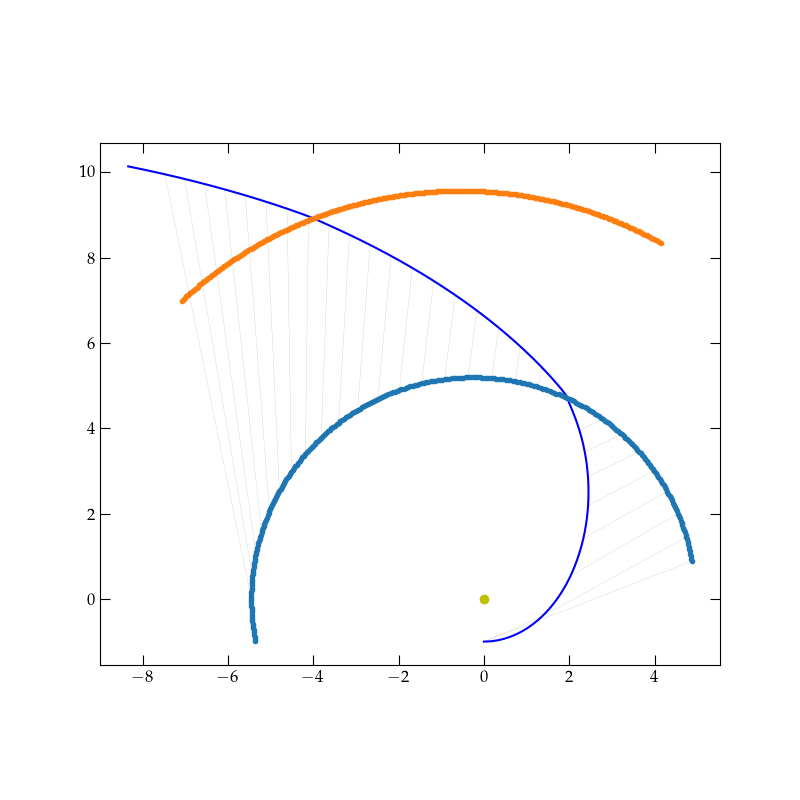

<IPython.core.display.Javascript object>


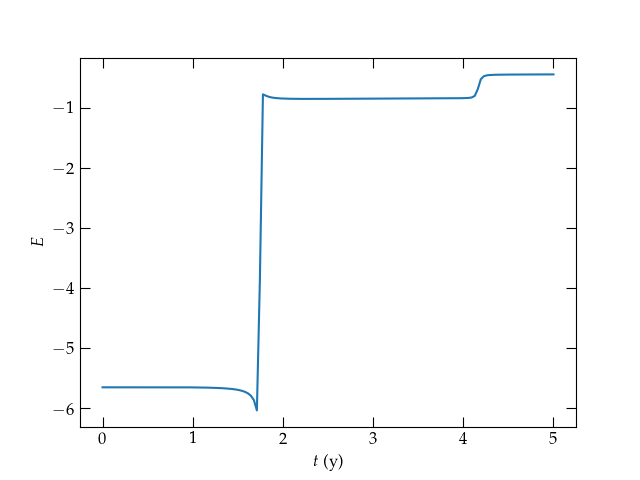

In [11]:
plt.close('all')
t_range = (0, 6)
Y1[4] = 0.18
Y1[5] = 1.11
sat.solve(Y1, t_range)
#sat.plot_trajectory((1.7,1.85), N=100, Sun=False)
sat.plot_trajectory()
sat.plot_satellite_energy((0,5))

<IPython.core.display.Javascript object>


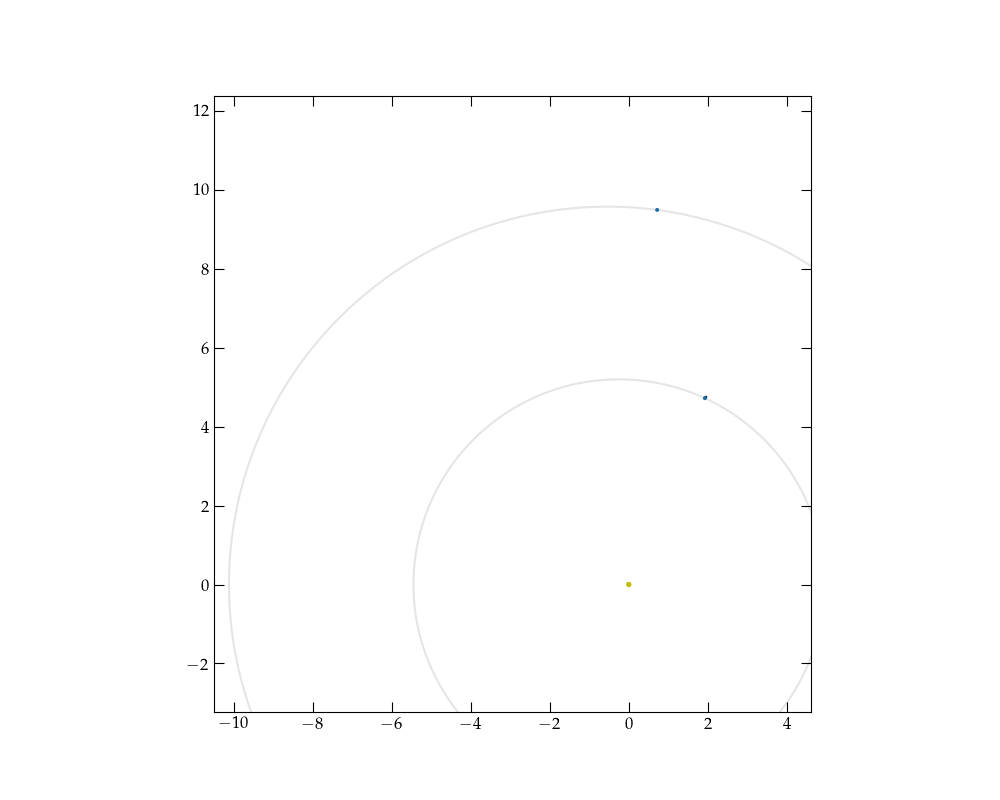

In [12]:
a = sat.animate(100);

In [ ]:
sat.plot_satellite_energy()

In [13]:
sat.save_animation()

I'm going to start rendering now. This can take a long time...


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(width='500px'), max=1.0)

In [ ]:
JSat.frame(np.linspace(2.47, 2.49, 11))

In [ ]:
wingdbstub.Ensure()

In [ ]:
JSat.plot_trajectory((2.45, 2.5), N=100, Jupiter=True)

In [ ]:
df

In [ ]:
np.argmin(df.r1)

In [ ]:
JSat.solution.y_events

In [ ]:
tvals = np.linspace(0, 20, 100)
Y = JSat(tvals)


In [ ]:
wingdbstub.Ensure()

In [ ]:
JSat.plot_trajectory()

In [ ]:
Jupiter.a**1.5

In [ ]:
sqrt(1 + Jupiter.mass)

In [13]:
plt.close('all')

In [ ]:
JSat.plot_trajectory()

In [ ]:
print(Jupiter)

In [ ]:
def dtheta(rJ, f):
    r = rJ * Jupiter.radius
    x = Jupiter.a * sqrt(Jupiter.mass)
    return np.degrees(Jupiter.mass * Jupiter.a * 2 * (x - r) / (r*f)**2)

In [ ]:
dtheta(30, 2)

In [ ]:
dtheta(10,3)